In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r'C:\Users\arun kumar\Desktop\figma+HACKATHONS\Coronavirus-Probability-Checker\Coronavirus-Probability-Checker-master\data.csv')

In [66]:
import pickle
with open(r'C:\Users\arun kumar\Desktop\figma+HACKATHONS\Coronavirus-Probability-Checker\Coronavirus-Probability-Checker-master\data.pkl','wb') as f:
    pickle.dump(r'C:\Users\arun kumar\Desktop\figma+HACKATHONS\Coronavirus-Probability-Checker\Coronavirus-Probability-Checker-master\data.csv',f)

In [3]:
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,99.254765,1,85,1,1,1
1,98.954284,0,55,0,-1,0
2,101.647720,0,84,0,0,1
3,101.318212,1,12,0,1,1
4,99.139178,1,24,0,0,0


In [5]:
df.tail()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
2884,101.712022,0,42,1,-1,1
2885,100.435787,0,97,1,1,0
2886,100.750620,0,5,0,0,1
2887,99.927393,0,96,1,1,0
2888,99.519023,0,15,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fever          2889 non-null   float64
 1   bodyPain       2889 non-null   int64  
 2   age            2889 non-null   int64  
 3   runnyNose      2889 non-null   int64  
 4   diffBreath     2889 non-null   int64  
 5   infectionProb  2889 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 135.5 KB


In [7]:
df['fever']

0        99.254765
1        98.954284
2       101.647720
3       101.318212
4        99.139178
           ...    
2884    101.712022
2885    100.435787
2886    100.750620
2887     99.927393
2888     99.519023
Name: fever, Length: 2889, dtype: float64

In [8]:
df['diffBreath'].value_counts()

-1    1027
 1     948
 0     914
Name: diffBreath, dtype: int64

In [9]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,99.999273,0.510903,49.899965,0.491866,-0.027345,0.500519
std,1.134316,0.499968,28.847724,0.500020,0.826508,0.500086
min,98.000300,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.036548,0.000000,25.000000,0.000000,-1.000000,0.000000
50%,99.993046,1.000000,49.000000,0.000000,0.000000,1.000000
75%,100.962298,1.000000,74.000000,1.000000,1.000000,1.000000
max,101.992313,1.000000,100.000000,1.000000,1.000000,1.000000


In [38]:
df.isnull()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2884,False,False,False,False,False,False
2885,False,False,False,False,False,False
2886,False,False,False,False,False,False
2887,False,False,False,False,False,False


visual EDA

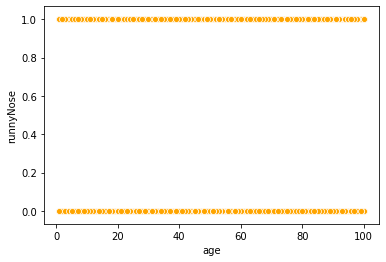

In [41]:
sns.scatterplot(df['age'], df['runnyNose'],color='orange')

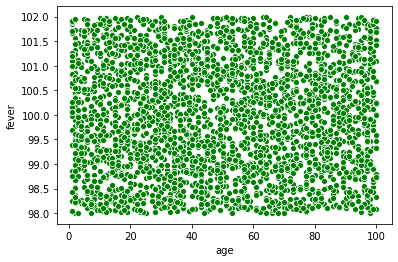

In [42]:
sns.scatterplot(df['age'], df['fever'],color='green')

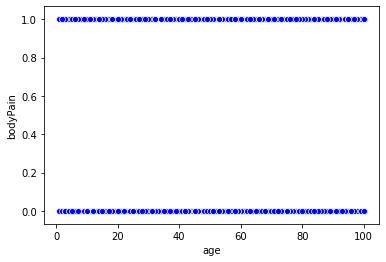

In [43]:
sns.scatterplot(df['age'], df['bodyPain'],color='blue')

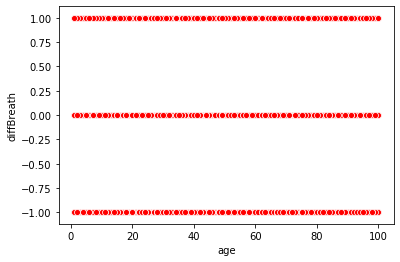

In [44]:
sns.scatterplot(df['age'], df['diffBreath'],color='red')

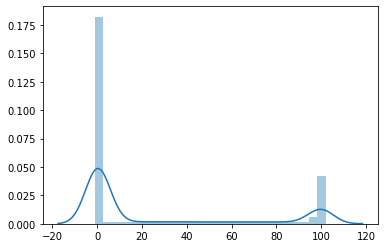

In [46]:
sns.distplot(df)

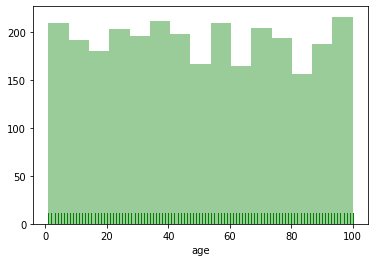

In [48]:
sns.distplot(df['age'], kde=False, rug=True,color='green');

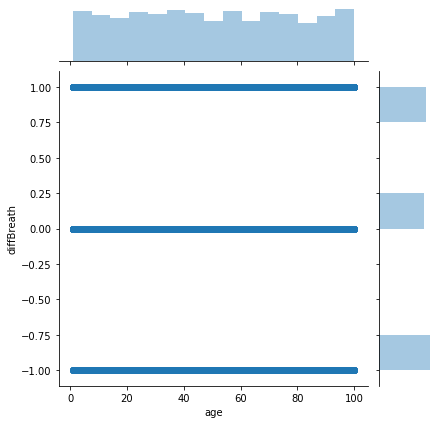

In [50]:
sns.jointplot(x="age", y="diffBreath", data=df);

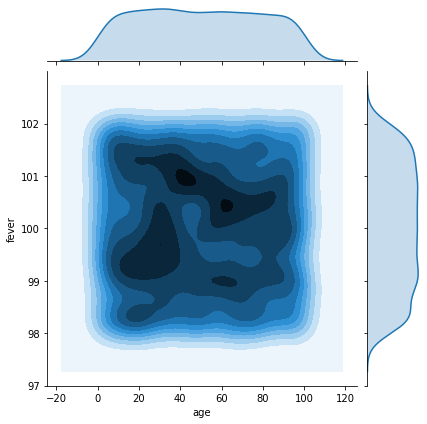

In [52]:
sns.jointplot(x="age", y="fever", data=df, kind="kde");

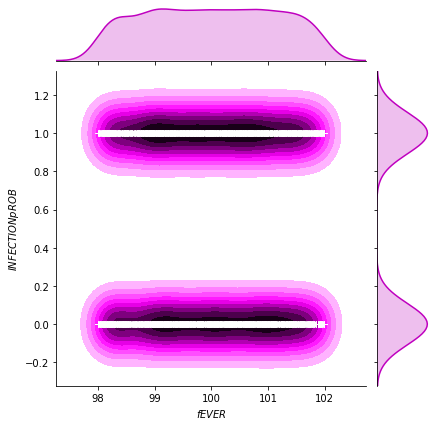

In [54]:
g = sns.jointplot(x="fever", y="infectionProb", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$fEVER$", "$INFECTIONpROB$");

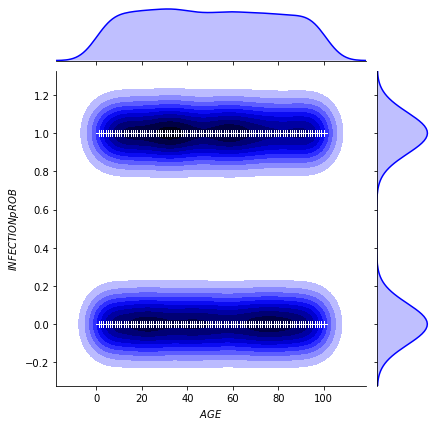

In [56]:
g = sns.jointplot(x="age", y="infectionProb", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$AGE$", "$INFECTIONpROB$");

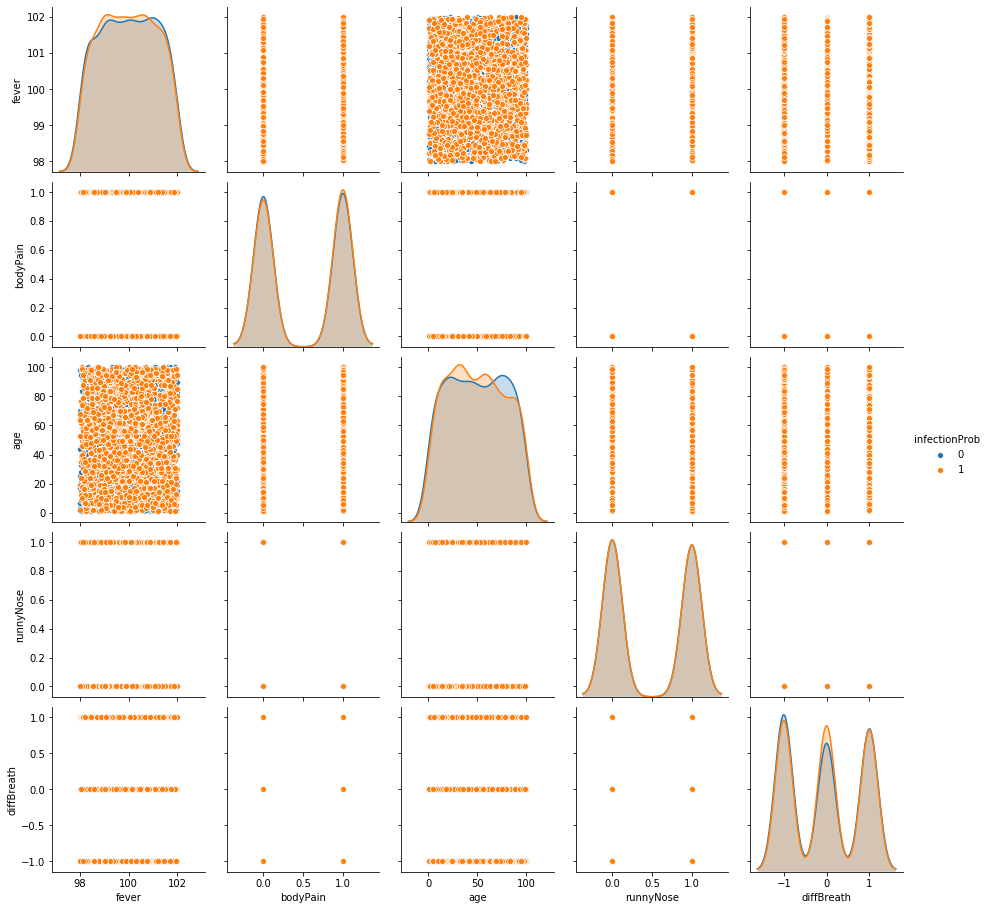

In [57]:
sns.pairplot(df, hue="infectionProb");

## Train Test Splitting

In [10]:
import numpy as np


In [11]:
def data_split(data, ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
np.random.permutation((7))

array([2, 5, 0, 1, 3, 4, 6])

In [14]:
train, test = data_split(df, 0.2)

In [15]:
train

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1811,98.228244,1,70,0,0,1
1835,101.091649,1,69,1,0,0
965,101.981402,0,60,0,0,1
1234,100.425669,0,61,0,-1,1
662,100.502494,0,3,1,0,1
...,...,...,...,...,...,...
1638,100.823703,0,16,1,0,1
1095,99.092296,1,10,1,1,0
1130,101.223455,1,84,1,0,0
1294,100.944881,0,44,0,1,1


In [16]:
test

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
471,101.649511,0,36,0,0,0
1206,98.852075,1,34,1,1,1
2382,100.808617,0,52,1,-1,0
2013,99.756587,1,55,1,1,1
2885,100.435787,0,97,1,1,0
...,...,...,...,...,...,...
109,100.181416,0,91,1,1,1
1894,101.252918,0,9,1,1,0
163,98.792579,1,68,1,0,0
1924,99.712089,0,76,0,0,0


In [23]:
X_train = train[['fever', 'bodyPain', 'age', 'runnyNose', 'diffBreath']].to_numpy()
X_test = test[['fever', 'bodyPain', 'age', 'runnyNose', 'diffBreath']].to_numpy()

In [22]:
Y_train = train[['infectionProb']].to_numpy().reshape(2312,)
Y_test = test[['infectionProb']].to_numpy().reshape(577,)

In [24]:
Y_train

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
inputFeatures = [99, 1, 22, -1, 1]
infProb =clf.predict_proba([inputFeatures])[0][1]

In [64]:
infProb

0.5148453578887754